<a href="https://colab.research.google.com/github/MinYeongPark/AI_practice/blob/main/221017%EC%8B%A4%EC%8A%B5_2_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%ED%95%99%EC%8A%B5%ED%95%98%EB%8A%94_%EB%B0%A9%EB%B2%95(%EC%88%9C%EC%A0%84%ED%8C%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

### 순전파 실습 : 가중치 부여와 가중합 계산

In [ ]:
torch.manual_seed(1017)

network = nn.Linear(in_features=3, out_features=7) 
# 입력으로 길이가 3인 텐서를 받고(in_features), 이를 길이가 7인 tensor로 출력하는(out_features) 인공 신경망

In [ ]:
torch.manual_seed(1017) # colab 환경이기 때문에 셀별로 seed를 지정해 주어야 값이 변하지 않음

inputs = torch.randn(3) # 예시를 들기 위해 값이 랜덤이고 길이가 3인 텐서를 생성
inputs

tensor([-0.4318,  0.0749, -0.1667])

In [ ]:
network(inputs) # 만들어놓은 입력값이 인공 신경망을 통과해서 결과값을 출력

# -> 위 값은 어떻게 출력된걸까?

tensor([ 0.0314,  0.3959, -0.4911,  0.4519,  0.2199, -0.2257,  0.4324],
       grad_fn=<AddBackward0>)

In [ ]:
network.weight # 초기 가중치를 확인

Parameter containing:
tensor([[ 0.3569,  0.2498,  0.1576],
        [-0.4434, -0.4714,  0.0233],
        [ 0.2524,  0.3831, -0.0351],
        [-0.2784, -0.3108, -0.5440],
        [ 0.5353,  0.4227,  0.3971],
        [-0.1924,  0.5192, -0.1625],
        [ 0.2561,  0.5234,  0.3877]], requires_grad=True)

In [ ]:
torch.sum(inputs * network.weight[0]) # 0.0314가 나와야하는데 값이 다르게 출력되고 있다

tensor(-0.1617, grad_fn=<SumBackward0>)

In [ ]:
network # network를 확인해보니 bias 인자의 기본값이 True로 지정되어 있음을 확인

Linear(in_features=3, out_features=7, bias=True)

In [ ]:
torch.manual_seed(1017)

network_nobias = nn.Linear(in_features=3, out_features=7, bias=False) # 다른 값은 그대로 둔 채 bias만 False로 두고 인공 신경망을 다시 생성
network_nobias.weight # bias 없이 다시 생성된 인공 신경망의 가중치를 확인

Parameter containing:
tensor([[ 0.3569,  0.2498,  0.1576],
        [-0.4434, -0.4714,  0.0233],
        [ 0.2524,  0.3831, -0.0351],
        [-0.2784, -0.3108, -0.5440],
        [ 0.5353,  0.4227,  0.3971],
        [-0.1924,  0.5192, -0.1625],
        [ 0.2561,  0.5234,  0.3877]], requires_grad=True)

In [ ]:
network_nobias(inputs)

tensor([-0.1617,  0.1523, -0.0745,  0.1876, -0.2657,  0.1490, -0.1361],
       grad_fn=<SqueezeBackward3>)

In [ ]:
torch.sum(inputs * network.weight[0]) # bias가 없는 경우에는 입력과 가중치의 곱이 네트워크의 출력과 제대로 들어맞는 것을 확인 가능

tensor(-0.1617, grad_fn=<SumBackward0>)

In [ ]:
# 그럼 bias는 모든 노드들이 똑같을까?

bias_first_output = network(inputs)[0] # bias가 존재하는 인공 신경망의 첫번째 출력값 
nobias_first_output = network_nobias(inputs)[0] # bias가 존재하지 않는 인공 신경망의 첫번째 출력값 
bias_first_output - nobias_first_output # 첫번째 노드의 bias 값

tensor(0.1931, grad_fn=<SubBackward0>)

In [ ]:
network(inputs)[1] - network_nobias(inputs)[1] # 노드별로 bias가 다른것을 확인할 수 있음

tensor(0.2436, grad_fn=<SubBackward0>)

### 순전파 실습 : 활성화 함수의 적용

In [ ]:
# 앞서 만들어 놓았던 bias가 존재하는 인공 신경망을 그대로 가져오기
network

Linear(in_features=3, out_features=7, bias=True)

In [ ]:
# sigmoid 함수를 활성화 함수로 사용하기 위해 구현하기 

def sigmoid(x):
    return 1/(1+np.exp(-x)) # sigmoid 함수의 수식

In [ ]:
outputs = network(inputs) # 인공 신경망의 출력값을 변수로 할당
sigmoid(outputs) # sigmoid 함수를 구현할때 np.exp라는 numpy의 메소드를 사용했기 때문에 작동하지 않음

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
def sigmoid_torch(x):
    return 1/(1+torch.exp(-x)) # np.exp를 torch.exp로 변경

sigmoid_torch(outputs) # 잘 작동되는 것을 확인

tensor([0.5078, 0.5977, 0.3796, 0.6111, 0.5548, 0.4438, 0.6064],
       grad_fn=<MulBackward0>)

In [ ]:
ouputs_nograd = outputs.detach() # 역전파 과정에 필요하기 때문에 tensor에 저장되어있던 기울기를 제거
sigmoid(ouputs_nograd.numpy()) # tensor를 array로 변환하면 기존에 np.exp로 만들어 두었던 sigmoid 함수가 잘 작동되는 것을 확인

NameError: ignored

In [ ]:
np.round(sigmoid(ouputs_nograd.numpy()), 4) # 완벽한 재현을 위해서 반올림

array([0.5078, 0.5977, 0.3796, 0.6111, 0.5548, 0.4438, 0.6064],
      dtype=float32)

In [ ]:
# pytorch에 있는 메소드를 사용하면 훨씬 쉽게 구현이 가능하다

sig_act_func = nn.Sigmoid() # 따로 함수를 만들어줄 필요가 없음
sig_act_func(outputs)

tensor([0.5078, 0.5977, 0.3796, 0.6111, 0.5548, 0.4438, 0.6064],
       grad_fn=<SigmoidBackward0>)

In [ ]:
# pytorch를 사용하면 이 과정을 한번에 수행하는 인공 신경망을 구현 가능 
torch.manual_seed(1017)

total_network = nn.Sequential(  # 여러 layer를 한번에 묶어주는 pytorch의 메소드
    nn.Linear(3, 7), 
    nn.Sigmoid()
)

In [ ]:
total_network(inputs)

tensor([0.5078, 0.5977, 0.3796, 0.6111, 0.5548, 0.4438, 0.6064],
       grad_fn=<SigmoidBackward0>)

### 활성화 함수의 효과 확인하기 : 비선형성 증가

In [ ]:
### 데이터 불러오기

from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris['data']
iris_label = iris['target'] # 실제 데이터의 label를 가져오기
iris_colname = iris['feature_names']

In [ ]:
print(iris_data.shape, iris_label.shape) # label data의 경우 column이 따로 부여되지 않음

(150, 4) (150,)


In [ ]:
iris_labeldata = np.hstack([iris_data, iris_label.reshape(-1, 1)]) # reshape을 통해 column 차원을 부여하고, horizon 방향으로 합쳐줌
iris_df = pd.DataFrame(iris_labeldata, columns=iris_colname + ['label']) # iris_colname의 경우 label이 없으므로 추가
iris_df # pandas의 dataframe 형태로 만들어서 출력

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris_df.iloc[:, [0,2]]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [ ]:
iris_length = iris_df.iloc[:, [0, 2, 4]] # 이해하기 쉬운 그림을 그리기 위해서 변수를 2개로 줄임


,sepal length (cm),petal length (cm),label
0,5.1,1.4,0.0
1,4.9,1.4,0.0
2,4.7,1.3,0.0
3,4.6,1.5,0.0
4,5.0,1.4,0.0
...,...,...,...
145,6.7,5.2,2.0
146,6.3,5.0,2.0
147,6.5,5.2,2.0
148,6.2,5.4,2.0


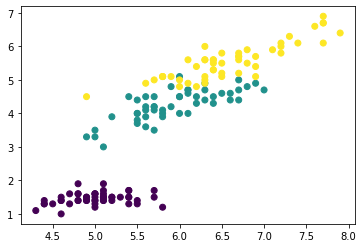

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(iris_length['sepal length (cm)'], iris_length['petal length (cm)'], c=iris_length['label']) #

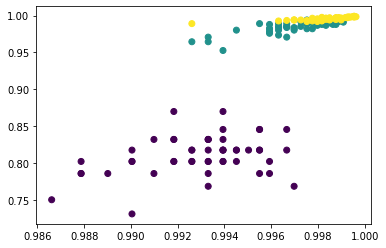

In [ ]:
sig_iris = sigmoid(iris_length.iloc[:, 0:2])
plt.scatter(sig_iris['sepal length (cm)'], sig_iris['petal length (cm)'],  c=iris_length['label']) 

# 단순히 한번 sigmoid 함수를 먹였다고 해서 선형으로 분리는 되지 않지만
# 데이터의 입력 공간에 변화가 생긴 것을 확인할 수 있음
# -> 즉, 활성화 함수는 데이터 입력 공간의 변화를 가져오고(비선형성 부여)
# 여기에 추가적으로 가중치 부여 및 여러번의 활성화 함수를 거치면 복잡한 데이터 공간도 최대한 직선으로 분리가 가능하게 됨